In [1]:
%matplotlib inline
import numpy
import pandas
import matplotlib.pyplot as plt

import os, sys
sys.path.append('../code')

# Generate events

In [102]:
from utils import straight_tracks_generator
events = straight_tracks_generator(n_events=10, n_tracks=2, n_noise=50, sigma=0.5)

# RANSAC

In [103]:
event = events[events.EventID == 0]
X = event.X.values.reshape(-1,1)
y = event.y.values

In [114]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(min_samples=3, max_trials=1000, residual_threshold=1.)
ransac.fit(X, y)

labels = ransac.inlier_mask_ - 1.

## Plot True and Recognized Tracks

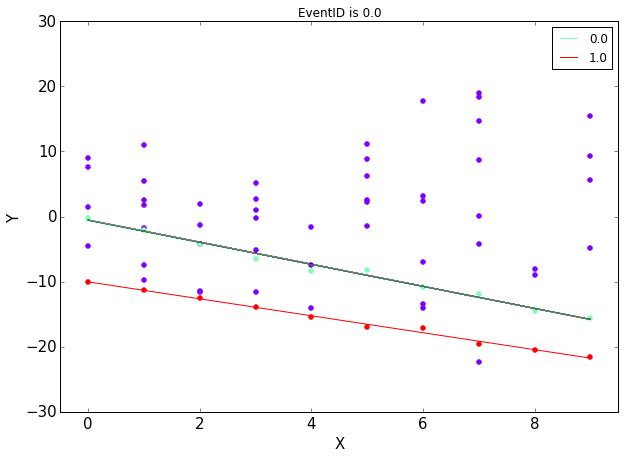

In [115]:
from utils import plot_straight_tracks
plot_straight_tracks(event, labels)
plt.xlim(-0.5, 9.5)
plt.ylabel('Y', size=15)
plt.xlabel('X', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Simple Template Matching

In [116]:

from TemplateMatching import SimpleTemplateMatching

stm = SimpleTemplateMatching(8, 1.0)
stm.fit(X, y)

params = stm.tracks_params_
labels2 = stm.labels_

## Plot True and Recognized Tracks

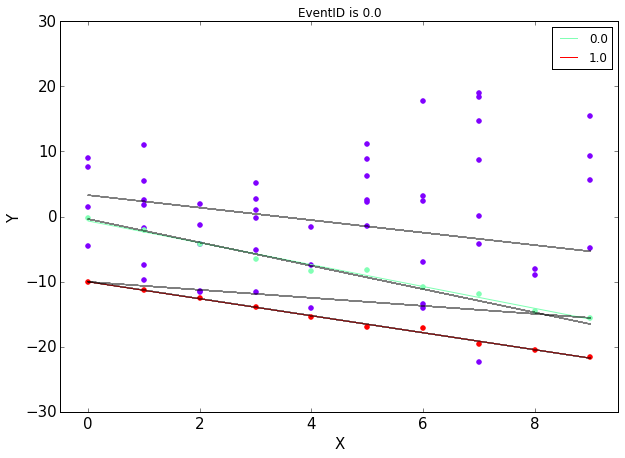

In [117]:
from utils import plot_straight_tracks
plot_straight_tracks(event, labels2)
plt.xlim(-0.5, 9.5)
plt.ylabel('Y', size=15)
plt.xlabel('X', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

## Tracks Reconstruction Quality

In [118]:
from metrics import ParameterMatchingEfficiency, HitsMatchingEfficiency
results = pandas.DataFrame(columns=['EventID', 'HmAvgEff',
                                    'HmRecoEff', 'HmGhostRate', 'HmCloneRate', 
                                    'PmRecoEff', 'PmGhostRate', 'PmCloneRate'])

for event_id in numpy.unique(events.EventID.values):
    
    event = events[events.EventID == event_id]
    X = event.X.values.reshape(-1,1)
    y = event.y.values
    
    stm = SimpleTemplateMatching(8, 1.)
    stm.fit(X, y)
    labels = stm.labels_
    
    hme = HitsMatchingEfficiency()
    hme.fit(event, labels)
    
    pme = ParameterMatchingEfficiency(delta_k = 0.4, delta_b=2.)
    pme.fit(event, labels)
    
    results.loc[len(results)] = [event_id, hme.avg_efficiency_, 
                                 hme.recognition_efficiency_, hme.ghost_rate_, hme.clone_rate_, 
                                 pme.recognition_efficiency_, pme.ghost_rate_, pme.clone_rate_]

In [119]:
results.mean(axis=0)

EventID        4.500000
HmAvgEff       0.543784
HmRecoEff      0.950000
HmGhostRate    0.600000
HmCloneRate    0.000000
PmRecoEff      0.950000
PmGhostRate    0.950000
PmCloneRate    0.100000
dtype: float64

# RANSAC and Template Matching

In [120]:
from TemplateMatching import RANSACTemplateMatching

ransac = RANSACRegressor(min_samples=2, max_trials=1000, residual_threshold=1)
stm = RANSACTemplateMatching(n_hits=8, ransac_estimator=ransac)
stm.fit(X, y)

params = stm.tracks_params_
labels3 = stm.labels_

## Plot True and Recognized Tracks

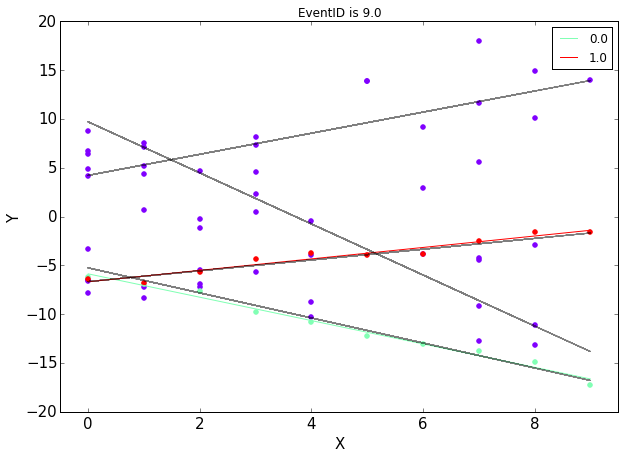

In [121]:
from utils import plot_straight_tracks
plot_straight_tracks(event, labels3)
plt.xlim(-0.5, 9.5)
plt.ylabel('Y', size=15)
plt.xlabel('X', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

## Tracks Reconstruction Quality

In [122]:
from metrics import ParameterMatchingEfficiency, HitsMatchingEfficiency
results = pandas.DataFrame(columns=['EventID', 'HmAvgEff',
                                    'HmRecoEff', 'HmGhostRate', 'HmCloneRate', 
                                    'PmRecoEff', 'PmGhostRate', 'PmCloneRate'])

for event_id in numpy.unique(events.EventID.values):
    
    event = events[events.EventID == event_id]
    X = event.X.values.reshape(-1,1)
    y = event.y.values
    
    ransac = RANSACRegressor(min_samples=2, max_trials=100, residual_threshold=10)
    stm = RANSACTemplateMatching(n_hits=8, ransac_estimator=ransac)
    stm.fit(X, y)
    labels = stm.labels_
    
    hme = HitsMatchingEfficiency()
    hme.fit(event, labels)
    
    pme = ParameterMatchingEfficiency(delta_k = 0.4, delta_b=2.)
    pme.fit(event, labels)
    
    results.loc[len(results)] = [event_id, hme.avg_efficiency_, 
                                 hme.recognition_efficiency_, hme.ghost_rate_, hme.clone_rate_, 
                                 pme.recognition_efficiency_, pme.ghost_rate_, pme.clone_rate_]

In [123]:
results.mean(axis=0)

EventID        4.500000
HmAvgEff       0.265172
HmRecoEff      0.200000
HmGhostRate    0.550000
HmCloneRate    0.000000
PmRecoEff      0.150000
PmGhostRate    0.950000
PmCloneRate    0.000000
dtype: float64